In [63]:
# importando as bibliotecas necessárias
import sqlite3
import pandas as pd
# criando uma conexão com o banco de dados SQLite
conn = sqlite3.connect('database.db')

In [50]:
#coletando os dados de atividades de voos e histórico de fidelidade
consulta_atividade = """
SELECT
    *
FROM flight_activity fa
LEFT JOIN flight_loyalty_history flh
ON fa.loyalty_number = flh.loyalty_number
"""
# executando a consulta e armazenando o resultado em um DataFrame
df_atividade = pd.read_sql_query(consulta_atividade, conn)

In [64]:

# fechando a conexão com o banco de dados
conn.close()
# comando para mostrar a tabela resultante da consulta  
df_atividade.head()

#Selecionar as linhas que contém apenas dados numéricos
colunas =  ["year", "month", "flights_booked",
            "flights_with_companions", "total_flights",
            "distance", "points_accumulated", "salary",
            "clv", "loyalty_card"]
df_colunas_seleciondas = df_atividade.loc[:, colunas]

#Remover todas as linhas que contém valores nulos
df_treinamento = df_colunas_seleciondas.dropna()

#verificar se os dados não tem dados faltantes
df_treinamento.isna().sum()

year                       0
month                      0
flights_booked             0
flights_with_companions    0
total_flights              0
distance                   0
points_accumulated         0
salary                     0
clv                        0
loyalty_card               0
dtype: int64

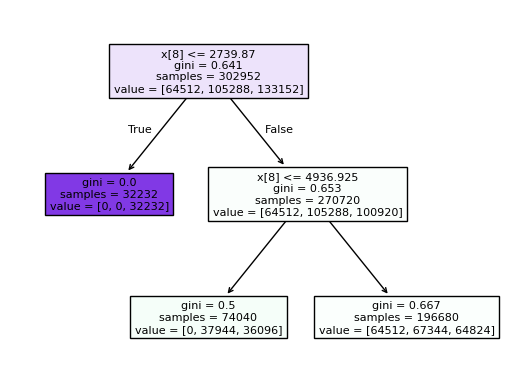

In [65]:
from sklearn import tree as tr

x = df_treinamento.drop(columns="loyalty_card")
y = df_treinamento.loc[:, "loyalty_card"]

#Comando: Defina o algoritmo Decision Tree
modelo = tr.DecisionTreeClassifier( max_depth=2)

#Comando: Treine o algoritmo Decision Tree
modelo_treinado = modelo.fit(x, y)

tr.plot_tree(modelo_treinado, filled=True); 

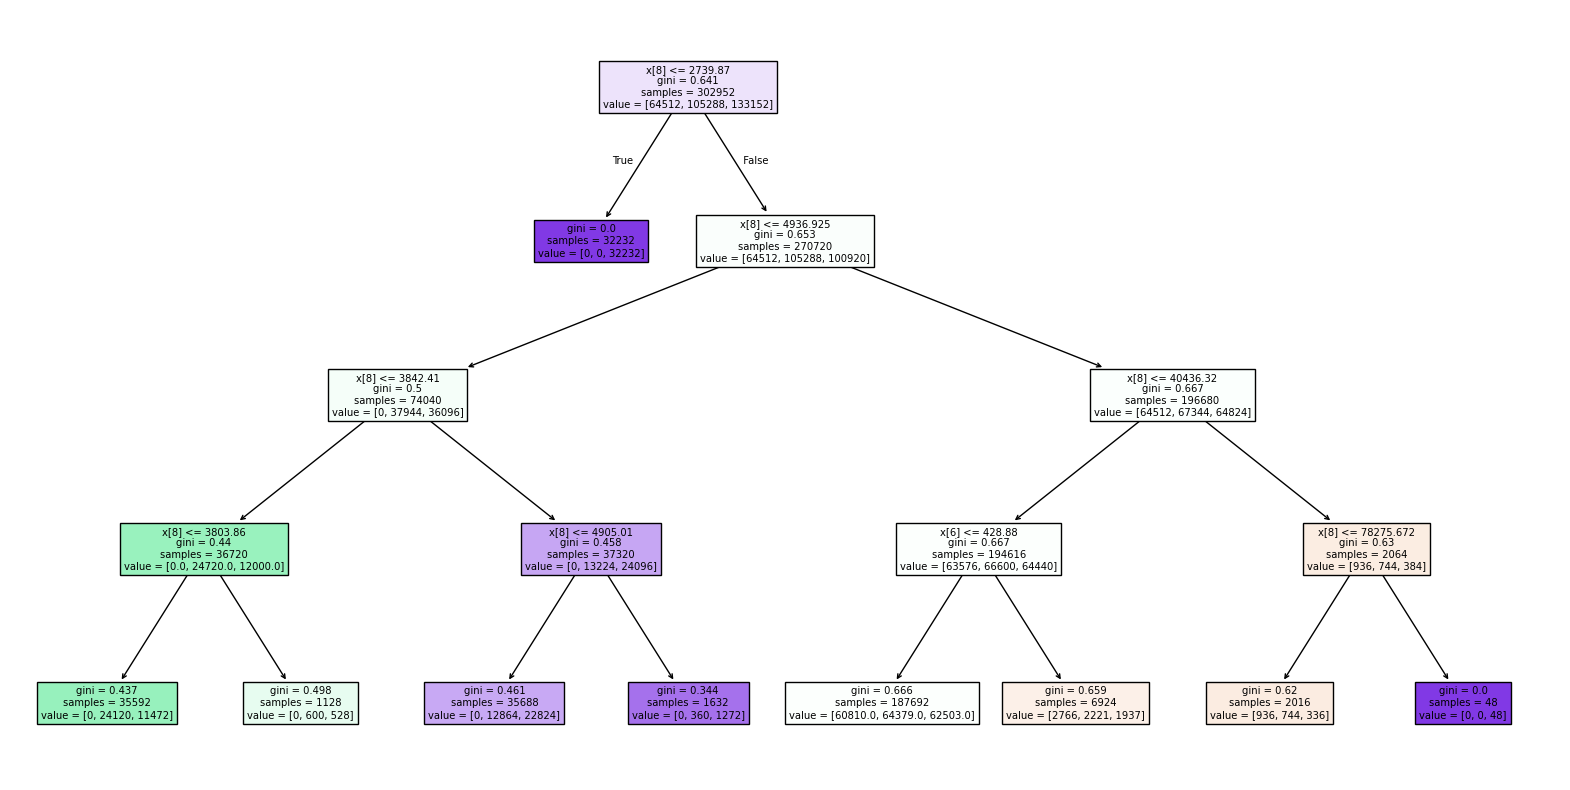

Prob - Aurora: 32.4% - Nova: 34.3% - Star: 33.3%


d:\DS curso\venv\Lib\site-packages\gradio\interface.py:416: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://58397586fcf5e9e882.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [72]:
# importar as bibliotecas necessárias
import sqlite3
import pandas as pd
import gradio as gr
import numpy as np
from sklearn import tree as tr
from matplotlib import pyplot as plt
%matplotlib inline

# abre a conexao com o banco de dados SQLite
conn = sqlite3.connect('database.db')   

#consulta dos dados nos banco de dados
consulta_atividade = """
SELECT
    *
FROM flight_activity fa
LEFT JOIN flight_loyalty_history flh
ON fa.loyalty_number = flh.loyalty_number
"""
df_atividade = pd.read_sql_query(consulta_atividade, conn)

#confere se deu certo
df_atividade.head()

#numero de dados faltantes em cada coluna

df_atividade.isna().sum()   

#seleciona as colunas que contém apenas dados numéricos
colunas =  ["year", "month", "flights_booked",
            "flights_with_companions", "total_flights",
            "distance", "points_accumulated", "salary",
            "clv", "loyalty_card"]
df_colunas_seleciondas = df_atividade.loc[:, colunas]   

#remove todas as linhas que contém valores nulos
df_treinamento = df_colunas_seleciondas.dropna()
#verifica se os dados não tem dados faltantes
df_treinamento.isna().sum()

#preparacao dos dados para o treinamento
X_atributos = df_treinamento.drop(columns="loyalty_card")
y_rotulos = df_treinamento.loc[:, "loyalty_card"]   
#Comando: Defina o algoritmo Decision Tree
modelo = tr.DecisionTreeClassifier( max_depth=4)
#Comando: Treine o algoritmo Decision Tree
modelo_treinado = modelo.fit( X_atributos, y_rotulos )
#algoritmo treinado
plt.figure(figsize=(20,10)) #ajuste do tamanho da imagem
tr.plot_tree(modelo_treinado, filled=True);
plt.show()
#previsao para um novo cliente
X_novo = X_atributos.sample()
previsao = modelo_treinado.predict_proba(X_novo)

print( "Prob - Aurora: {:.1f}% - Nova: {:.1f}% - Star: {:.1f}%".format(
   100 * previsao[0][0] ,
   100 * previsao[0][1] ,
   100 * previsao[0][2] 
))

# painel online para mostrar o resultado
def predict(*args):
    X_novo = np.array(args).reshape(1, -1)
    previsao = modelo_treinado.predict_proba(X_novo)

    return {"Aurora":previsao[0][0], "Nova":previsao[0][1], "Star":previsao[0][2]}

demo = gr.Interface(
    title="Previsão de Fidelidade",
    description="Inteligência Artifical para calcular a propensão de compra de clientes** \n\n*Utilize os sliders para ajustar os valoresde entrada.*",
    fn=predict,
    inputs=[
        gr.Radio([2017,2018], label="year"),
        gr.Slider( label="month", minimum=1, maximum=12, step=1,
                  randomize=True),
        gr.Slider( label="flights_booked", minimum=0, maximum=21, step=1,
                  randomize=True),
        gr.Slider( label="flights_with_companions", minimum=0, maximum=11, step=1,
                  randomize=True),          
        gr.Slider( label="total_flights", minimum=0, maximum=32, step=1,
                  randomize=True),
        gr.Slider( label="distance", minimum=0, maximum=6293, step=1,
                  randomize=True),  
        gr.Slider( label="points_accumulated", minimum=0.00, maximum=676.50, step=0.1,
                  randomize=True),  
        gr.Slider( label="salary", minimum=58486.00, maximum=407228.00, step=0.1,
                  randomize=True),  
        gr.Slider( label="clv", minimum=2119.89, maximum=83325.38, step=0.1,
                  randomize=True),  
    ],
    outputs= [  gr.Label(label="Previsao")], 
    allow_flagging="never"
)
#executa o painel
demo.launch(share=True)                  

In [73]:
import joblib
joblib.dump(modelo_treinado, 'modelo_cartao.pkl')


['modelo_cartao.pkl']